# Project: Investigating BMI

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
df_bmi_male = pd.read_excel('Indicator_BMI male ASM.xlsx')
df_bmi_female = pd.read_excel('Indicator_BMI female ASM.xlsx')

In [21]:
# 199 countries, 29 years of BMI data from 1980 - 2008

df_bmi_male.info()
df_bmi_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 30 columns):
Country    199 non-null object
1980       199 non-null float64
1981       199 non-null float64
1982       199 non-null float64
1983       199 non-null float64
1984       199 non-null float64
1985       199 non-null float64
1986       199 non-null float64
1987       199 non-null float64
1988       199 non-null float64
1989       199 non-null float64
1990       199 non-null float64
1991       199 non-null float64
1992       199 non-null float64
1993       199 non-null float64
1994       199 non-null float64
1995       199 non-null float64
1996       199 non-null float64
1997       199 non-null float64
1998       199 non-null float64
1999       199 non-null float64
2000       199 non-null float64
2001       199 non-null float64
2002       199 non-null float64
2003       199 non-null float64
2004       199 non-null float64
2005       199 non-null float64
2006       199 non-null float64


In [22]:
df_bmi_male.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,23.154766,23.210207,23.264803,23.317216,23.370511,23.423494,23.477257,23.531952,23.588947,23.647007,...,24.286431,24.364220,24.443058,24.524137,24.608454,24.698525,24.792133,24.890399,24.992627,25.096985
std,1.951327,1.967498,1.984175,2.000956,2.019040,2.037600,2.056481,2.076111,2.095735,2.115467,...,2.346440,2.374490,2.401638,2.427122,2.451776,2.476273,2.499167,2.522022,2.544270,2.565742
min,19.013940,19.039020,19.068040,19.096750,19.130460,19.163970,19.197400,19.234810,19.270900,19.311050,...,19.795870,19.827680,19.863570,19.836960,19.807170,19.789270,19.787810,19.801800,19.829100,19.866920
25%,21.270820,21.307840,21.362375,21.419880,21.445770,21.466555,21.492555,21.501815,21.517340,21.548785,...,22.042460,22.115070,22.216580,22.291485,22.368735,22.449190,22.536780,22.626700,22.726450,22.832135
50%,23.314240,23.390540,23.460160,23.568610,23.635840,23.731090,23.821570,23.873210,23.928010,24.027100,...,24.606080,24.655400,24.733580,24.806710,24.889650,25.002620,25.114630,25.237470,25.364760,25.498870
75%,24.820280,24.886830,24.940370,25.019430,25.056045,25.105660,25.203390,25.274230,25.335225,25.370375,...,26.013855,26.086555,26.185345,26.295505,26.383020,26.473265,26.527285,26.590595,26.662160,26.822320
max,28.124490,28.355090,28.582480,28.815280,29.045480,29.281050,29.520020,29.753190,29.978770,30.204360,...,32.130970,32.318340,32.506350,32.702150,32.896970,33.095170,33.296400,33.492820,33.693730,33.896340


In [23]:
df_bmi_female.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,23.551895,23.636731,23.717486,23.794261,23.871700,23.948768,24.026354,24.101613,24.179135,24.257050,...,25.047757,25.141257,25.235746,25.330914,25.426468,25.524670,25.623414,25.722934,25.822991,25.922315
std,2.373709,2.379001,2.383634,2.388356,2.394132,2.399376,2.404929,2.412764,2.420209,2.428897,...,2.591842,2.616410,2.640705,2.663935,2.686824,2.708790,2.731850,2.755381,2.779820,2.804152
min,18.471660,18.488120,18.511740,18.541800,18.571510,18.602650,18.637170,18.678080,18.717610,18.756500,...,19.361850,19.475290,19.599600,19.724140,19.856570,19.995200,20.133930,20.271590,20.409630,20.545310
25%,21.381535,21.473250,21.574530,21.661595,21.751690,21.839245,21.946910,22.023520,22.083805,22.134145,...,23.027540,23.093965,23.080235,23.180375,23.266745,23.369165,23.460305,23.573220,23.649280,23.725360
50%,23.982930,24.077130,24.172600,24.219870,24.320810,24.380480,24.493710,24.540240,24.649660,24.761070,...,25.342760,25.382780,25.445730,25.556540,25.651060,25.719340,25.805880,25.866680,25.950560,25.991130
75%,25.399470,25.409600,25.417480,25.499165,25.576505,25.651460,25.684955,25.711160,25.725245,25.759635,...,26.411360,26.493580,26.617015,26.724570,26.824420,26.947940,27.054670,27.190400,27.340775,27.485340
max,28.279610,28.571760,28.853050,29.141020,29.420180,29.708760,29.990650,30.268740,30.523970,30.783980,...,32.945980,33.162440,33.381400,33.613340,33.838650,34.076190,34.315890,34.548430,34.785400,35.022940


In [24]:
# Combining the 2 graphs into one to make it easier to manipulate

bmi_male = np.repeat('male', 199)
bmi_female = np.repeat('female', 199)
df_bmi_male['gender'] = bmi_male
df_bmi_female['gender'] = bmi_female
df_bmi = df_bmi_male.append(df_bmi_female)
df_bmi.head(10)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,gender
0,Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,...,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058,male
1,Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,...,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657,male
2,Algeria,22.25703,22.34745,22.43647,22.52105,22.60633,22.69501,22.76979,22.84096,22.90644,...,23.77659,23.86256,23.95294,24.05243,24.15957,24.27001,24.38270,24.48846,24.59620,male
3,Andorra,25.66652,25.70868,25.74681,25.78250,25.81874,25.85236,25.89089,25.93414,25.98477,...,26.83179,26.92373,27.02525,27.12481,27.23107,27.32827,27.43588,27.53363,27.63048,male
4,Angola,20.94876,20.94371,20.93754,20.93187,20.93569,20.94857,20.96030,20.98025,21.01375,...,21.37480,21.43664,21.51765,21.59924,21.69218,21.80564,21.93881,22.08962,22.25083,male
5,Antigua and Barbuda,23.31424,23.39054,23.45883,23.53735,23.63584,23.73109,23.83449,23.93649,24.05364,...,24.99158,25.05857,25.13039,25.20713,25.29898,25.39965,25.51382,25.64247,25.76602,male
6,Argentina,25.37913,25.44951,25.50242,25.55644,25.61271,25.66593,25.72364,25.78529,25.84428,...,26.88103,26.96067,26.99882,27.04738,27.11001,27.18941,27.28179,27.38889,27.50170,male
7,Armenia,23.82469,23.86401,23.91023,23.95649,24.00181,24.04083,24.08736,24.13334,24.17219,...,24.18045,24.26670,24.37698,24.50332,24.64178,24.81447,24.99160,25.17590,25.35542,male
8,Australia,24.92729,25.00216,25.07660,25.14938,25.22894,25.31849,25.41017,25.50528,25.60001,...,26.74486,26.84397,26.93858,27.03801,27.13871,27.24614,27.35267,27.45878,27.56373,male
9,Austria,24.84097,24.88110,24.93482,24.98118,25.02208,25.06015,25.10680,25.14747,25.19333,...,25.87471,25.93806,25.99583,26.06356,26.14360,26.21107,26.29374,26.38136,26.46741,male


## Some exploration of BMI data

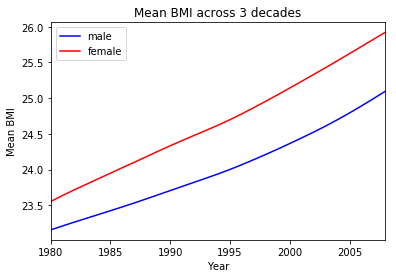

In [25]:
# Plotting the trend across ~3 decades

df_bmi.loc[df_bmi['gender'] == 'male'].mean().plot(kind='line', color='blue', label = 'male')
df_bmi.loc[df_bmi['gender'] == 'female'].mean().plot(kind='line', color='red', label = 'female')
plt.legend()
plt.title('Mean BMI across 3 decades')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

#### Observations

1. Mean BMI has steadily risen globally. 
2. Gap between men and women has also been increasing.
3. Rate of increase seems to have turned slightly steeper for both men and women between 1995 - 2000.

In [26]:
# Which segments had the biggest rise in BMI?

df_bmi.columns = df_bmi.columns.astype(str)
df_bmi['bmi_change']= df_bmi['2008'] - df_bmi['1980']
df_bmi_change = df_bmi[['Country', 'gender', 'bmi_change']]
df_bmi_change.set_index('Country').sort_values(by=['bmi_change'], ascending=False).head(20)

,gender,bmi_change
Country,,
Cook Islands,female,7.62465
Tonga,female,7.08561
Samoa,female,6.83086
Nauru,female,6.74333
Cook Islands,male,6.47190
Marshall Islands,female,5.98025
Fiji,female,5.79522
French Polynesia,female,5.77234
Nauru,male,5.77185


#### Observations

1. Segments with the biggest increases in BMI tend to come from the populations in the Pacific Islands. 
2. Segments with the biggest increases are typically female.

median    25.752525
count    398.000000
mean      25.509650
std        2.715820
min       19.866920
25%       23.287723
50%       25.752525
75%       27.133527
max       35.022940
Name: 2008, dtype: float64


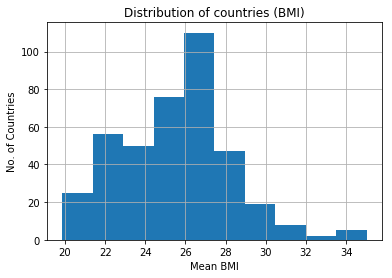

In [27]:
# What is the current distribution of countries according to mean BMI levels

ax = df_bmi['2008'].hist()
ax.set_ylabel('No. of Countries')
ax.set_xlabel('Mean BMI')
ax.set_title('Distribution of countries (BMI)')
print('median    {}'.format(df_bmi['2008'].median()))
print(df_bmi['2008'].describe());

#### Observations

1. Graph is close to symmetric
2. ~ 50% of the world can be considered overweight/obese

## Exploring correlations between BMI and other macro indicators

Comparisons will be made across 3 other sets of data - working hours, sugar consumption, blood pressure. The first 2 are seen as possible factors that could contribute to growing obesity phenomenon and the last is seen as something that obesity could lead to. 

Comparisons are done across 2 clusters of countries that are deemed to be similar economically, culturally and perhaps even genetically to enhance perspective.Hypothesis is that data of countries in a cluster will display similar trends.

### BMI general trends

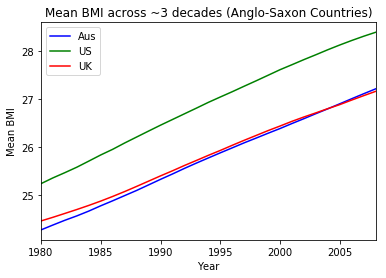

In [28]:
# Plotting trend of mean BMI for first cluster of countries across same time period

df_bmi = df_bmi.iloc[:, 0:30]
df_bmi.loc[df_bmi['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_bmi.loc[df_bmi['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_bmi.loc[df_bmi['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean BMI across ~3 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

#### Observations

1. BMI has steadily increased for all three countries at similar rates.
2. US has the highest BMI.
3. Australia's BMI overtook the UK somewhere between 2000 and 2005.

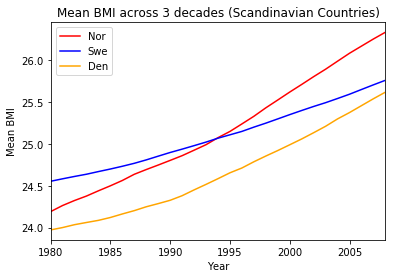

In [29]:
# Plotting trend of mean BMI for second cluster of countries across same time period

df_bmi.loc[df_bmi['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_bmi.loc[df_bmi['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_bmi.loc[df_bmi['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean BMI across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

#### Observations

1. While BMI for all countries have been increasing steadily, Norway has seen the biggest increase amongst the three.
2. Rate of increase in Norway increased around 1995, for Denmark around 1990.

### (1) Is there a correlation between working hours and BMI?

Broad idea here is that societies with long working hours generate unhealthy environments that are not conducive for engaging in dietary habits and other activities (such as exercising) that could ameliorate obesity.

In [32]:
# Loading data

df_working_hours = pd.read_excel('indicator_hours per week.xlsx')

In [33]:
# Checking data

df_working_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 29 columns):
Working hours per week    52 non-null object
1980                      15 non-null float64
1981                      15 non-null float64
1982                      15 non-null float64
1983                      20 non-null float64
1984                      20 non-null float64
1985                      20 non-null float64
1986                      22 non-null float64
1987                      23 non-null float64
1988                      23 non-null float64
1989                      23 non-null float64
1990                      34 non-null float64
1991                      27 non-null float64
1992                      25 non-null float64
1993                      27 non-null float64
1994                      33 non-null float64
1995                      30 non-null float64
1996                      28 non-null float64
1997                      40 non-null float64
1998                    

In [34]:
# Cleaning data to help in comparison efforts

df_working_hours.rename(columns={'Working hours per week': 'Country'}, inplace=True)
df_working_hours.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,34.578846,34.578846,34.376923,34.117307,34.415384,34.338461,34.482692,34.655769,34.819230,...,34.394231,34.363462,34.332693,33.742307,33.467309,33.411539,33.596154,33.298077,33.140386,33.109614
2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.990385,31.492307,31.378845,31.351924,31.384615,31.567308,31.736539,31.844231,31.817308,31.761345
3,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,NaN,NaN,NaN,34.000000,34.480769,34.596154,34.211538,33.903846,33.653846,...,32.153846,30.403846,29.884615,30.326923,30.365385,30.288462,29.788462,30.096154,30.211538,30.115385


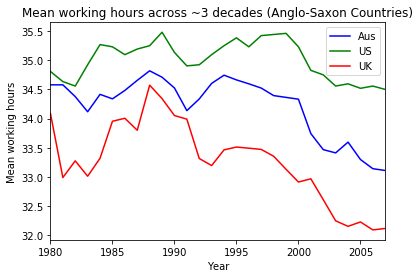

In [35]:
# Plotting trend of mean number of working hours for first cluster of countries

df_working_hours.loc[df_working_hours['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_working_hours.loc[df_working_hours['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_working_hours.loc[df_working_hours['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean working hours across ~3 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean working hours')
plt.xlabel('Year');

#### Observations

1. Albeit with fluctuations, working hours has generally declined, especially for Australia and the UK.
2. Number of working hours peaked just before 1990.
3. Rate of decline increased sharply around 2000.
4. United States has the highest number of working hours.

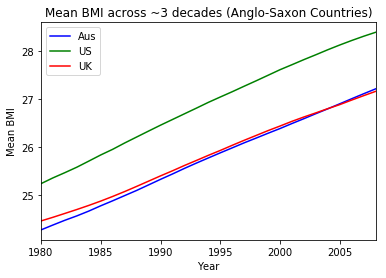

In [36]:
# Plotting trend of mean BMI for first cluster of countries across same time period

df_bmi = df_bmi.iloc[:, 0:30]
df_bmi.loc[df_bmi['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_bmi.loc[df_bmi['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_bmi.loc[df_bmi['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean BMI across ~3 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

The question I had going in was whether or not higher working hours contributed to a higher BMI.

On the face of it, that does not seem to be the case. The trends are in fact opposite. Any correlation is not clear either. The nature of movement seem very different (i.e. the fluctuations seen in the data on working hours do not correspond with the steady increase in BMI).

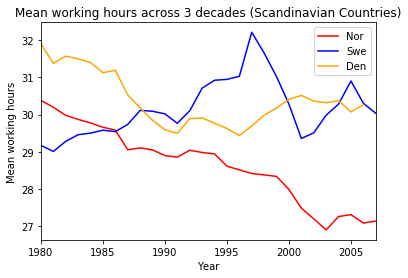

In [37]:
# Plotting trend of mean number of working hours for second cluster of countries

df_working_hours.loc[df_working_hours['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_working_hours.loc[df_working_hours['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_working_hours.loc[df_working_hours['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean working hours across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean working hours')
plt.xlabel('Year');

#### Observations

1. Both Norway and Denmark have seen a decrease in number of working hours, the drop in Norway has been greater.
2. Sweden has seen a general increase. 
3. Where the data ends post-2005, the Swedish and Danish work for a similar duration across the week.

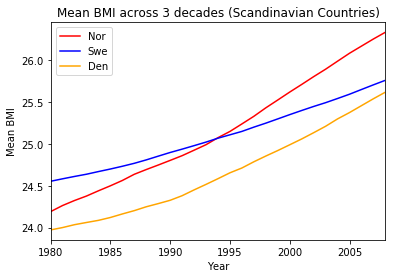

In [38]:
# Plotting trend of mean BMI for second cluster of countries across same time period

df_bmi.loc[df_bmi['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_bmi.loc[df_bmi['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_bmi.loc[df_bmi['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean BMI across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

Unlike the previous comparison, where the British had the lowest average working hours and a lower average BMI, and the Americans who had the highest average working hours and the highest BMI, the opposite is observable with regards to Scandinavian countries. The Norwegians generally worked lesser hours in recent years but had the highest BMI, whereas the Danish and Swedes worked more hours but had a lower BMI.

Also, one could make an observation that a decrease in working hours correlates with an increase in BMI over the same time period, this interestingly does not apply to the Swedish.

From these 2 comparisons, it is not obvious that there is a discernible and direct relationship between working hours and BMI. It is likely that the BMI of a nation is influenced by several other variables such as their eating habits.

### (2) Is there a correlation between sugar consumption and BMI?

The idea here is simply that there is a direct correlation between sugar consumption and BMI. An increase in the former would correspond with a similar and proportionate increase in the latter.

In [39]:
# Loading data

df_sugar_consumption = pd.read_excel('indicator sugar_consumption.xlsx')

# Preparing data

df_sugar_consumption.reset_index(inplace=True)
df_sugar_consumption.head()
df_sugar_consumption.rename(columns={'index':'Country'}, inplace=True)
df_sugar_consumption.columns = df_sugar_consumption.columns.astype(str)
df_sugar_consumption = df_sugar_consumption.iloc[:, np.r_[0, 20:45]]
df_sugar_consumption.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,46.58,46.58,46.58,46.58,46.58,46.58,49.32,49.32,49.32,...,54.80,68.49,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75
4,Algeria,82.19,82.19,73.97,82.19,82.19,79.45,84.93,93.15,79.45,...,73.97,73.97,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93


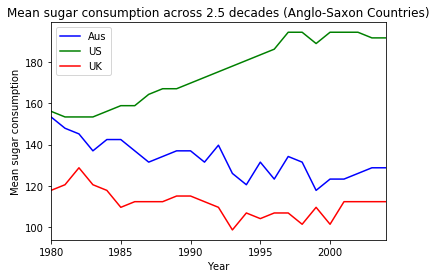

In [40]:
# Plotting trend of mean level of sugar consumption for first cluster of countries

df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean sugar consumption across 2.5 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean sugar consumption')
plt.xlabel('Year');

#### Observations

1. Aus and UK saw a decline in sugar consumption, US saw an increase.
2. Whatever the trend for the respective countries, sugar consumption starts to plateau around the year 2000.

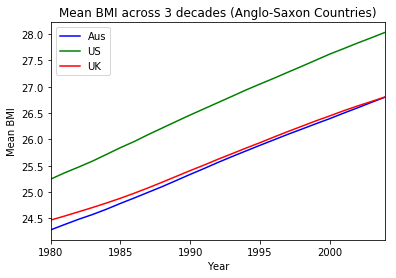

In [41]:
# Plotting trend of mean BMI for first cluster of countries across same time period

df_bmi.columns = df_bmi.columns.astype(str)
df_bmi_sc = df_bmi.loc[:, 'Country':'2004']
df_bmi_sc.loc[df_bmi['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_bmi_sc.loc[df_bmi['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_bmi_sc.loc[df_bmi['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean BMI across 3 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

The expected direct correlation does not really play out in this set of data. Aus and UK's mean BMI continues to increase even as their sugar consumption levels go south. Also, the widening gap in sugar consumption between the US on the one hand and Aus and UK does not really manifest itself in the BMI graph.

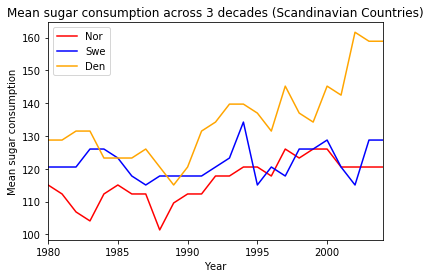

In [42]:
# Plotting trend of mean level of sugar consumption for second cluster of countries

df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_sugar_consumption.loc[df_sugar_consumption['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean sugar consumption across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean sugar consumption')
plt.xlabel('Year');

#### Observations

1. All countries saw an increase, but the rate of increase seen in Denmark is significantly higher than Sweden and Norway.

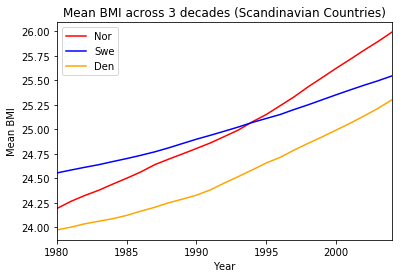

In [43]:
df_bmi_sc.loc[df_bmi['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_bmi_sc.loc[df_bmi['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_bmi_sc.loc[df_bmi['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean BMI across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

Even though Denmark started as the country with the highest level of sugar consumption and saw the highest increase, their mean BMI remained the lowest (although it does look that their BMI would overtake Sweden in another 5 years). Gap in mean BMI between Norway and Denmark widens with Norway at the front even though sugar consumption data of both countries widens in the opposite direction.

Sweden's moderate consumption of sugar seems to correspond with their slight increase in BMI over the years.

One again, echoing the observation made when looking at data from working hours, BMI looks like a complex unit with a range of variables that influence it.

### (3) Is there a correlation between BMI and SBP?

Having looked at some factors that could have played a part in driving BMI, I wanted to investigate BMI as a driving factor. The idea here is simply that there is a direct correlation between BMI and SBP. An increase in the former would correspond with a similar increase in the latter. The data here is broken down between genders mainly due to availability.

In [44]:
# Loading data

df_sbp_male = pd.read_excel('Indicator_SBP male ASM.xlsx')
df_sbp_female = pd.read_excel('Indicator_SBP female ASM.xlsx')

In [45]:
# Preparing data

df_sbp_male.rename(columns={'SBP male (mm Hg), age standardized mean':'Country'}, inplace=True)
df_sbp_female.rename(columns={'SBP female (mm Hg), age standardized mean':'Country'}, inplace=True)

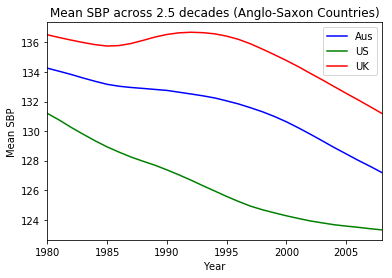

In [46]:
# Plotting trend of mean level of SBP for males in the first cluster of countries

df_sbp_male.loc[df_sbp_male['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_sbp_male.loc[df_sbp_male['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_sbp_male.loc[df_sbp_male['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean SBP across 2.5 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean SBP')
plt.xlabel('Year');

#### Observations

1. General decline in SBP for all three countries.
2. UK has the highest SBP, US has the lowest.
3. Gap has widened between countries, with US showing the fastest rate of decrease (albeit tapering off)

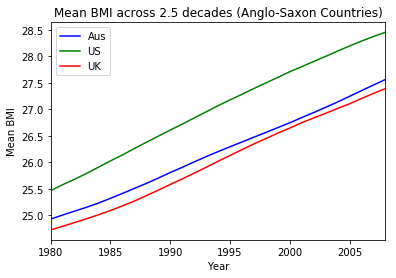

In [47]:
# Plotting trend of mean level of BMI for males in the first cluster of countries

df_bmi_male.loc[df_bmi_male['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_bmi_male.loc[df_sbp_male['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_bmi_male.loc[df_sbp_male['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean BMI across 2.5 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

Interestingly, SBP has been on a general decline despite an increase in BMI. Also, while US has the highest BMI, it has the lowest SBP. On the other hand, UK has the lowest BMI but the highest SBP. 

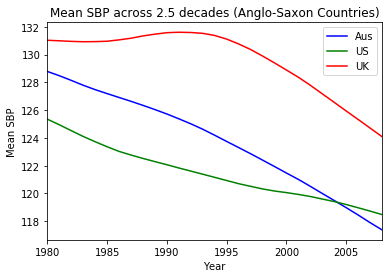

In [48]:
# Plotting trend of mean level of SBP for females in the first cluster of countries

df_sbp_female.loc[df_sbp_female['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_sbp_female.loc[df_sbp_female['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_sbp_female.loc[df_sbp_female['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean SBP across 2.5 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean SBP')
plt.xlabel('Year');

#### Observations

1. Females on average have lower SBP levels than men.
2. Same general declining trend observed as with males.
3. SBP for Australian females see significant decrease (seems to have begun in between 1990 - 1995)

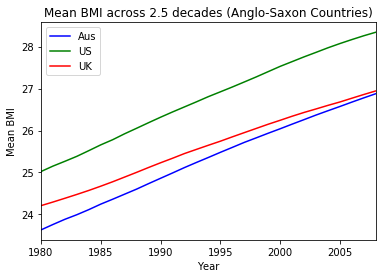

In [49]:
# Plotting trend of mean level of BMI for females in the first cluster of countries

df_bmi_female.loc[df_bmi_female['Country'] == 'Australia'].mean().plot(kind='line', color='blue', label='Aus')
df_bmi_female.loc[df_sbp_female['Country'] == 'United States'].mean().plot(kind='line', color='green', label='US')
df_bmi_female.loc[df_sbp_female['Country'] == 'United Kingdom'].mean().plot(kind='line', color='red', label='UK')
plt.legend()
plt.title('Mean BMI across 2.5 decades (Anglo-Saxon Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

Even though BMI has increased at a faster rate for Australian women than British women, SBP has fallen faster for women in AUS than in the UK.

On the face of this data, it would seem the correlation between BMI and SBP is the opposite of what was expected. Let's have a look at a second cluster of countries.

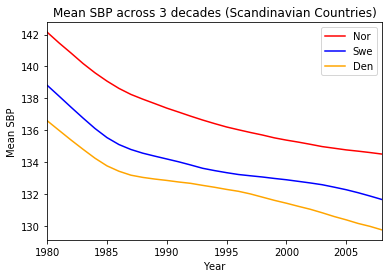

In [50]:
# Plotting trend of mean level of SBP for males in the second cluster of countries

df_sbp_male.loc[df_sbp_male['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_sbp_male.loc[df_sbp_male['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_sbp_male.loc[df_sbp_male['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean SBP across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean SBP')
plt.xlabel('Year');

#### Observations

1. Mean SBP levels of men decrease in a similar fashion.
2. Rate of decrease is particularly high pre-1985. Slows down after.
3. Norway has the highest levels of SBP, Denmark the lowest.

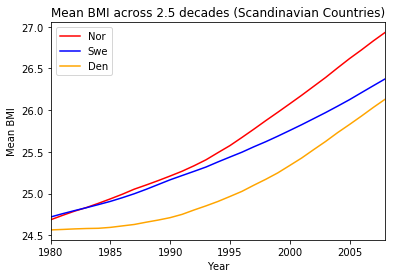

In [51]:
# Plotting trend of mean level of BMI for males in the second cluster of countries

df_bmi_male.loc[df_bmi_male['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_bmi_male.loc[df_bmi_male['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_bmi_male.loc[df_bmi_male['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean BMI across 2.5 decades (Scandinavian Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

BMI does not increase in a similar fashion for these 3 countries. BMI increases at a higher rate in Norway and Denmark than Sweden. If trend continues, Sweden would have the lowest BMI out of the 3 countries. Rate of BMI increase also heightens post-1990, particularly for Denmark and Norway.

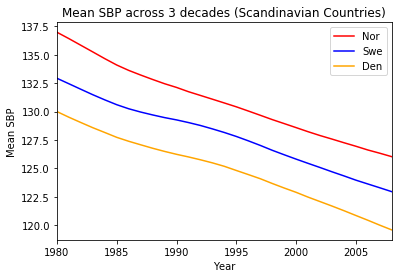

In [52]:
# Plotting trend of mean level of SBP for females in the second cluster of countries

df_sbp_female.loc[df_sbp_female['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_sbp_female.loc[df_sbp_female['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_sbp_female.loc[df_sbp_female['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean SBP across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean SBP')
plt.xlabel('Year');

#### Observations

1. Mean SBP levels of women also decrease in a similar fashion.
2. Rate of decrease is generally quite uniform across the years.
3. Mirroring data from men, Norway has the highest levels of SBP for women, Denmark the lowest.

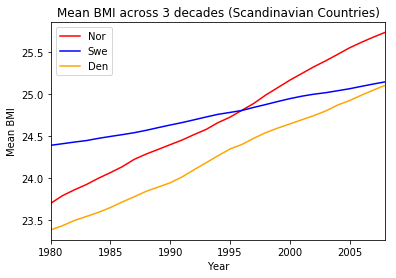

In [53]:
# Plotting trend of mean level of BMI for females in the second cluster of countries

df_bmi_female.loc[df_bmi_female['Country'] == 'Norway'].mean().plot(kind='line', color='red', label='Nor')
df_bmi_female.loc[df_bmi_female['Country'] == 'Sweden'].mean().plot(kind='line', color='blue', label='Swe')
df_bmi_female.loc[df_bmi_female['Country'] == 'Denmark'].mean().plot(kind='line', color='orange', label='Den')
plt.legend()
plt.title('Mean BMI across 3 decades (Scandinavian Countries)')
plt.ylabel('Mean BMI')
plt.xlabel('Year');

Similar to comparison done with men data, BMI does not increase in a similar fashion here. Mean Swedish female BMI increases at a much lower rate as compared to Norway and Denmark.

This data is surprising in that it is contrary to mainstream scientific expositions that basically link a higher BMI with higher blood pressure. It is however probably unwise to draw any conclusions from this simple comparison. Other factors could very well play crucial roles. For e.g. the decrease in blood pressure could have been a result of higher governmental expenditure on healthcare facilities and breakthroughs in this area of medicine that help contain and lower blood pressure.

More questions could also be asked about how the data was obtained to determine reliability of data. Better data segmentation factoring in other variables such as age and existing medical conditions could also enhance understanding.

<a id='conclusions'></a>
## Conclusions

This exploration left me with more questions than answers, with all my initial hypotheses overturned. The data showed me that

1. Correlations between BMI and other variables that one would have assumed to be straightforward, was not.
2. Countries that I clustered together did not always exhibit similar trends which begs the question why.
3. Probably also implies that no single comparison can have a universal conclusion across countries. Each country has its own complex context that influences how one variable affects another. For e.g. in the US higher number of working hours corresponds with higher BMI while in Norway lower number of wokring hours corresponds with higher BMI.

### Some things I would have done to improve this report

1. When comparing BMI with other variables, instead of looking at them in 2 charts, I would look at them in one more comprehensive line chart with mean BMI levels as a third axis.

2. I would have compared a few more variables such as governmental healthcare expenditure to get a fuller picture.

3. I would also look at cluster of countries in Asia and Africa to get a more holistic global view.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])